In [2]:
import pandas as pd
import numpy as np
import ast
import collections as c
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
convs=pd.read_csv('../data/bbAllFullConvosAW.csv',sep=';')

/home/mako0970/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (38,39,40,42,43,44,46,47,48,50,51,52,54,55,56,58,59,60,62,63,64,66,67,68,70,71,72,74,75,76,78,79,80,82,83,84,86,87,88,90,91,92,94,95,96,98,99,100,102,103,104,106,107,108,110,111,112,114,115,116,118,119,120,122,123,124,126,127,128,130,131,132,134,135,136,138,139,140,142,143,144,146,147,148,150,151,152,154,155,156,158,159,160,162,163,164,166,167,168,170,171,172) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
len(convs)

5279

In [5]:
convs.allNames=convs.allNames.apply(lambda x: ast.literal_eval(x))

In [6]:
allUsers=list(set(convs.allNames.sum()))

In [7]:
len(allUsers)

2752

So 2752 unique users participated in our local conversations

In [8]:
before=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-15 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-10-25 00:00:00'))]

In [9]:
during=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-25 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-04 00:00:00'))]

In [10]:
after=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-04 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-14 00:00:00'))]

In [11]:
lafter=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-14 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-23 00:00:00'))]

In [12]:
bUsers=list(set(before.allNames.sum()))

In [13]:
len(bUsers)

778

In [14]:
dUsers=list(set(during.allNames.sum()))

In [15]:
len(dUsers)

1758

In [16]:
aUsers=list(set(after.allNames.sum()))

In [17]:
len(aUsers)

1233

In [18]:
laUsers=list(set(lafter.allNames.sum()))

In [19]:
len(laUsers)

828

In [20]:
len(set(bUsers) & set(dUsers))

465

In [21]:
len(set(bUsers) & set(aUsers))

359

In [22]:
len(set(bUsers) & set(laUsers))

276

In [23]:
len(set(dUsers) & set(aUsers))

696

In [24]:
len(set(dUsers) & set(laUsers))

477

In [25]:
len(set(aUsers) & set(laUsers))

445

In [26]:
len(set(dUsers) & set(aUsers) & set(bUsers) & set(laUsers))

166

* So more than a half of before users were also active during and about hald in after
* And about 40% of during users were active after and almost 30% lafter
* Over 150 users were active in all four periods

# Patterns by users

### One-person conversations

In [27]:
len(convs[convs.userSetLen==1])/float(len(convs))

0.2509945065353287

Quarter of all conversations are users responding to themselves!!!

In [28]:
np.median(convs.convSize[convs.userSetLen==1])

2.0

In [29]:
np.percentile(convs.convSize[convs.userSetLen==1],90)

2.0

In [30]:
max(convs.convSize[convs.userSetLen==1])

12

In [33]:
convs[(convs.userSetLen==1) & (convs.convSize==12)] # add .values to see as list

,Unnamed: 0,tweet0,date0,username0,text0,tweet1,date1,username1,text1,tweet2,...,text43,branching,convSize,allNames,convoEndTime,convoLen,userSetLen,avgTimePerReply,longTailed,medianReplyTime
72,84,269602947242029056,2012-11-17 00:48:46,anthonyd1972,#whitehouse defense bizarre by the day. #petre...,269603217615233026,2012-11-17 00:49:50,anthonyd1972,@anthonyd1972 so if the CIA talking points wer...,269603536260706304,...,0,True,12,[anthonyd1972],2012-11-17 00:56:09,443,1,40.272727,True,81


So the vast majority of these (90%) are one reply to oneself, but there is a self-conversation of 12 steps (rant about politics)

In [34]:
np.median(convs.convoLen[convs.userSetLen==1])

233.0

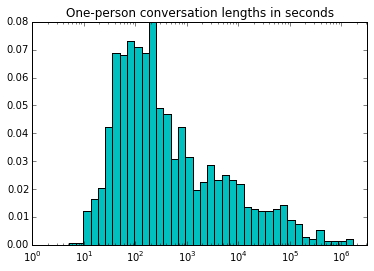

In [35]:
convoLen = convs.convoLen[convs.userSetLen==1].dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('One-person conversation lengths in seconds')

In [36]:
np.median(convs.avgTimePerReply[convs.userSetLen==1])

221.0

In [37]:
np.median(convs.medianReplyTime[convs.userSetLen==1])

224.0

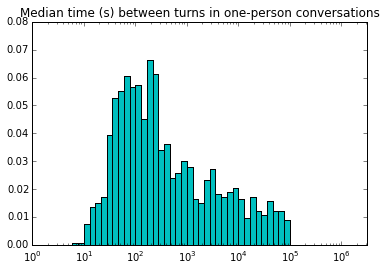

In [38]:
medRepTime=convs[convs.userSetLen==1].medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in one-person conversations')

** Takeway:**
* So the conversations users have with themselves tend to be quite a bit shorter than all the conversations
* While the number of tweets still has median of 2.0 and 90th percentile of 2 as well
* The avg and median gaps between replies in the conversation are much shorter than overall
* Pretty intuitive, since they don't have to wait for another party for a reply - no back and forth

### Two-person conversations

In [39]:
len(convs[convs.userSetLen==2])/float(len(convs))

0.7323356696344004

Almost three quarters of the conversations are with just one other person

In [40]:
np.median(convs.convSize[convs.userSetLen==2])

2.0

In [41]:
np.percentile(convs.convSize[convs.userSetLen==2],90)

4.0

In [42]:
max(convs.convSize[convs.userSetLen==2])

43

In [44]:
convs[(convs.userSetLen==2) & (convs.convSize==43)].values

array([[44, 261901117695332352, '2012-10-26 18:44:27', 'Megglezzz',
        "Fuck the @NHL @NHLPA , all of the greedy monkeys that have denied us hockey. If you think we're gonna be forgiving after this you're wrong",
        261904642399686657, '2012-10-26 18:58:27', 'DDougyy',
        '@Megglezzz I read that as "greasy monkeys" instead of greedy. Also thought we could lose some humor with the latest news.',
        261904999309791232, '2012-10-26 18:59:52', 'Megglezzz',
        '@DDougyy greasy monkeys huh? Yeah that could work too. But this seriously makes me ashamed to call myself a fan.',
        261908598827917312, '2012-10-26 19:14:10', 'DDougyy',
        "@Megglezzz I know, right? It's kind off embarrassing.",
        261909742300053504, '2012-10-26 19:18:43', 'Megglezzz',
        '@DDougyy and they wonder why no one respects the sport',
        261911804198936578, '2012-10-26 19:26:54', 'DDougyy',
        '@Megglezzz Yep, I hear ya. :(', 261912049620246528,
        '2012-10-26

* The median suggests that about half of these are still just one tweet and one reply - short exchanges
* The 90th percentile being 4 suggests that bigger proportion of these are longer than in one-person conversations
* The longest convo here is 43 steps - hockey and Dr. WHO, with concerns about Sandy and preparation at the end
* The 3 out of 4 two-person conversations with 12 tweets are about Sandy in some way: evacuation, prep, infrustricture failure, role of global warming

In [45]:
convs[(convs.userSetLen==2) & (convs.convSize==12)].values

array([[48, 263634418994909185, '2012-10-31 13:31:58', 'pacovell',
        '@JOEDOEchef these are pretty different failures, but we should be designing and building better systems here',
        263714145256480768, '2012-10-31 18:48:46', 'JOEDOEchef',
        '@pacovell not so. Both were water related failures(ie floods) occurring at power stations near bodies of water',
        263716756823080960, '2012-10-31 18:59:09', 'pacovell',
        '@JOEDOEchef Tokyo failure, major earthquake and tsunami took generation offline.  Our generation is OK. Still, improved design would help.',
        263717928594198528, '2012-10-31 19:03:48', 'pacovell',
        "@JOEDOEchef I guess what I'm saying is if Tokyo events happened here it would be FAR worse than in Tokyo - they have better infrastructure",
        263720371415576577, '2012-10-31 19:13:30', 'JOEDOEchef',
        '@pacovell my pt exactly!  This is a joke!  This is not a tsunami !!!  If it was this would be apocalypse!',
        2637199974

In [46]:
np.median(convs.convoLen[convs.userSetLen==2])

948.5

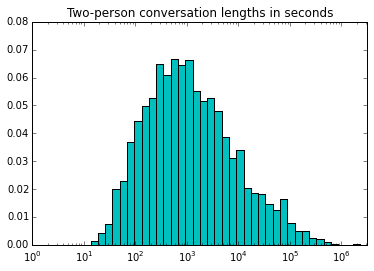

In [47]:
convoLen = convs.convoLen[convs.userSetLen==2].dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Two-person conversation lengths in seconds')

In [48]:
np.median(convs.avgTimePerReply[convs.userSetLen==2])

582.83333333349992

In [49]:
np.median(convs.medianReplyTime[convs.userSetLen==2])

511.0

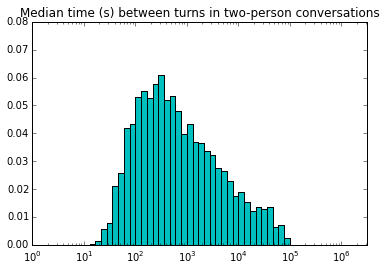

In [50]:
medRepTime=convs[convs.userSetLen==2].medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in two-person conversations')

** Takeway:**
* The two-person conversations are longer than overall (median)
* And much longer than one-person conversations
* The median number of steps is still 2, but 90th percentile is now 4 -  bigger proportion of these are longer than in one-person conversations
* In addition, the breaks between tweets are longer than overall (438s) and definitely one-person conversations
* **Difference between monolog and dialiog/ personal and social**

### More-than-two person conversations

In [51]:
len(convs[convs.userSetLen>2])/float(len(convs))

0.016669823830270884

Only **1.7%** of the conversations are with more than two people

In [52]:
np.median(convs.convSize[convs.userSetLen>2])

4.0

In [53]:
np.percentile(convs.convSize[convs.userSetLen>2],90)

6.0

In [54]:
max(convs.convSize[convs.userSetLen>2])

11

In [55]:
convs[(convs.userSetLen>2) & (convs.convSize==11)].values

array([[574, 264477309006925826, '2012-11-02 21:21:18', 'NYCMayorsOffice',
        'We have decided to cancel the NYC marathon. The New York Road Runners will have additional information in days ahead for participants.',
        264477517690306562, '2012-11-02 21:22:08', 'ThomasSickler',
        '@NYCMayorsOffice THANK YOU! THANK GOD ITS CANCELED #NYCMarathon',
        264486296720916481, '2012-11-02 21:57:01', 'CG_DarkAngel',
        "@NYCMayorsOffice @MikeBloomberg Thank you for canceling NYC's marathon.  It was the right move.  #fb",
        264570354259865600, '2012-11-03 03:31:02', 'PaulyFook',
        '@NYCMayorsOffice Waiting for the Mayor to take responsibility as to why it was canceled so late. No excuses.',
        264484676402552832, '2012-11-02 21:50:35', 'emburkh',
        '@NYCMayorsOffice @NYCService maybe the runners can #volunteer instead!',
        264482738990632960, '2012-11-02 21:42:53', 'FlemingPhD',
        "@NYCMayorsOffice : Thank God.  Good decision.  We are p

* The median length of these conversations is 4 and the 90th percentile is 6
* This suggests that these are, on average, longer conversations than overall than overall and one- and two-person convos
* The longest convo here is 12 steps - discussion of NYC marathon being cancelled

In [56]:
np.median(convs.convoLen[convs.userSetLen>2])

1213.5

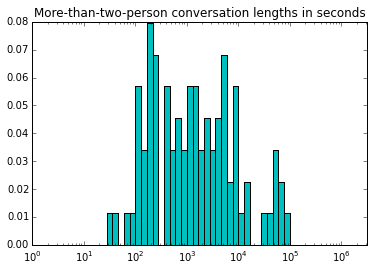

In [60]:
convoLen = convs.convoLen[convs.userSetLen>2].dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('More-than-two-person conversation lengths in seconds')

The number of these conversations is too small for a clear distribution at this resolution (100 bars)

In [61]:
np.median(convs.avgTimePerReply[convs.userSetLen>2])

412.5

In [62]:
np.median(convs.medianReplyTime[convs.userSetLen>2])

769.75

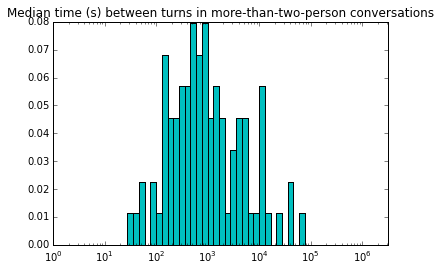

In [63]:
medRepTime=convs[convs.userSetLen>2].medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in more-than-two-person conversations')

** Takeway:**
* The more-than-two-person conversations are longer than overall (median)
* And much longer than one-person and two-person conversations
* The number of tweets in these conversations are higher than overall and others (median=4, 90th=6)
* But the breaks between tweets are the same as overall and slightly longer than two-person (**CHECK FOR SIG**)
* **As long as it's a dialog/social, more or less the same tempo of conversation is kept**

# Conversation types (# users) across time stages

In [64]:
len(before)/float(len(convs))

0.15438530024625877

In [65]:
len(during)/float(len(convs))

0.39193028982761885

In [66]:
len(after)/float(len(convs))

0.27467323356696344

In [67]:
len(lafter)/float(len(convs))

0.16650880848645577

**Summary**
* 15% of conversations happen Before
* 39% During
* 27% After
* and 17% Long After
Check if these percentages hold for different types of conversations or if they over/underrepresented in certain periods

### Frequency of one-person convos across periods

In [69]:
len(before[before.userSetLen==1])/float(len(convs[convs.userSetLen==1]))

0.19169811320754718

In [70]:
len(during[during.userSetLen==1])/float(len(convs[convs.userSetLen==1]))

0.300377358490566

In [71]:
len(after[after.userSetLen==1])/float(len(convs[convs.userSetLen==1]))

0.300377358490566

In [72]:
len(lafter[lafter.userSetLen==1])/float(len(convs[convs.userSetLen==1]))

0.1909433962264151

In [250]:
len(before[before.userSetLen==1])/float(len(before))

0.3116564417177914

In [251]:
len(during[during.userSetLen==1])/float(len(during))

0.19236346060898984

In [252]:
len(after[after.userSetLen==1])/float(len(after))

0.27448275862068966

In [253]:
len(lafter[lafter.userSetLen==1])/float(len(lafter))

0.28782707622298065

**Takeaway:**
* One-person conversations seem to be underrepresented (sligtly) During
* They are a bit overrepresented everywhere else
* CHECK CHI-SQUARE

### Frequency of two-person convos across periods

In [75]:
len(before[before.userSetLen==2])/float(len(convs[convs.userSetLen==2]))

0.14355923435075013

In [76]:
len(during[during.userSetLen==2])/float(len(convs[convs.userSetLen==2]))

0.4190377651319193

In [77]:
len(after[after.userSetLen==2])/float(len(convs[convs.userSetLen==2]))

0.26668391101914124

In [78]:
len(lafter[lafter.userSetLen==2])/float(len(convs[convs.userSetLen==2]))

0.15959648215209518

In [254]:
len(before[before.userSetLen==2])/float(len(before))

0.6809815950920245

In [255]:
len(during[during.userSetLen==2])/float(len(during))

0.7829869502174964

In [256]:
len(after[after.userSetLen==2])/float(len(after))

0.7110344827586207

In [257]:
len(lafter[lafter.userSetLen==2])/float(len(lafter))

0.70193401592719

**Takeaway:**
* The two-person conversations seem to be under-represented in After
* And a tiny bit underrepresented in Before and Long After
* And a tiny bit overrepresented in During
* CHECK CHI-SQUARE

### Frequency of more-than-two-person convos across periods

In [79]:
len(before[before.userSetLen>2])/float(len(convs[convs.userSetLen>2]))

0.06818181818181818

In [80]:
len(during[during.userSetLen>2])/float(len(convs[convs.userSetLen>2]))

0.5795454545454546

In [81]:
len(after[after.userSetLen>2])/float(len(convs[convs.userSetLen>2]))

0.23863636363636365

In [82]:
len(lafter[lafter.userSetLen>2])/float(len(convs[convs.userSetLen>2]))

0.10227272727272728

In [258]:
len(before[before.userSetLen>2])/float(len(before))

0.007361963190184049

In [259]:
len(during[during.userSetLen>2])/float(len(during))

0.024649589173513776

In [260]:
len(after[after.userSetLen>2])/float(len(after))

0.014482758620689656

In [261]:
len(lafter[lafter.userSetLen>2])/float(len(lafter))

0.010238907849829351

**Takeway:**
* While there are only 88 more-than-two-person conversations altogether
* It seems that they are highly concentrated in the During period
* About 58% of them are in this period
* Every other period has these underrepresented, but especially Before
* CHECK CHI-SQUARE

## Analysis by User features

Supplement the data with other user-level information from the data frame

In [84]:
sup=pd.read_csv('../data/bbContextOntopicRepliesBothSidesDF.csv',sep=';')

In [86]:
sup.columns

Index([u'id', u'username', u'user_id', u'geo_enabled', u'followCount',
       u'friendCount', u'faveCount', u'tweetCount', u'date', u'timing',
       u'coordinates', u'location', u'source', u'retweetCount', u'isRetweet',
       u'origTweet', u'origUser', u'origTime', u'origPlace',
       u'origUserCreated', u'contributors', u'hashtags', u'has_media', u'urls',
       u'mentions', u'replyWho', u'replyWhat', u'text', u'date_obj'],
      dtype='object')

* The biggest number of users in a single convo is 11 - replies to Bloomberg cancelling the marathon
* The next largest number of users in a conversation is 5 - start there

In [116]:
#make new columns for the unique conversation participants (up to 5)
for i in xrange(5):
    userCol='convoUser'+str(i)
    convs[userCol]=convs.allNames.apply(lambda x: x[i] if len(x)>i else 0)

Imprtant aside:
* People's friends and follower's nerwork change
* They also change size over the time periods we are studying
* For this purpose of classifying conversations by users, we can pick the earliest
* To signify what kind of user they were going into the event
* Later we can also look at users whose follower and other counts changed dramatically
* It's hard to trust this data as it seems to fluctuate back and forth pretty randomly
* There seem to be **glitches** in the counts around the time of the event - most of them come back to normal afterwards

In [ ]:
for i in xrange(5):
    userCol='convoUser'+str(i)
    followCol='followersUser'+str(i)
    friendCol='friendsUser'+str(i)
    faveCol='favesUser'+str(i)
    tweetCount='tweetCountUser'+str(i)
    convs[followCol]=0
    convs[friendCol]=0
    convs[faveCol]=0
    convs[tweetCount]=0
    #temp=pd.merge(left=convs, right=sup[['username','followCount','friendCount','faveCount','tweetCount']],how='left', left_on=userCol, right_on='username')
    #convs[[followCol,friendCol,faveCol,tweetCount]]=temp[['followCount','friendCount','faveCount','tweetCount']]
    #MERGING is NOT WORKING HERE
    for index, row in convs.iterrows():
        t=sup.followCount[sup.username==row[userCol]].unique()
        if len(t)>0:
            convs.loc[index,followCol]=t[0]
        else:
            convs.loc[index,followCol]=np.nan
        
        t=sup.friendCount[sup.username==row[userCol]].unique()
        if len(t)>0:
            convs.loc[index,friendCol]=t[0]
        else:
            convs.loc[index,friendCol]=np.nan
        
        t=sup.faveCount[sup.username==row[userCol]].unique()
        if len(t)>0:
            convs.loc[index,faveCol]=t[0]
        else:
            convs.loc[index,faveCol]=np.nan
        
        t=sup.tweetCount[sup.username==row[userCol]].unique()
        if len(t)>0:
            convs.loc[index,tweetCount]=t[0]
        else:
            convs.loc[index,tweetCount]=np.nan

* This was taking too long so I did overnight in python
* Instead just read in the dataframe that now includes these fields

In [3]:
convs=pd.read_csv('../data/bbAllFullConvosAW.csv',sep=';')

/home/mako0970/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (38,39,40,42,43,44,46,47,48,50,51,52,54,55,56,58,59,60,62,63,64,66,67,68,70,71,72,74,75,76,78,79,80,82,83,84,86,87,88,90,91,92,94,95,96,98,99,100,102,103,104,106,107,108,110,111,112,114,115,116,118,119,120,122,123,124,126,127,128,130,131,132,134,135,136,138,139,140,142,143,144,146,147,148,150,151,152,154,155,156,158,159,160,162,163,164,166,167,168,170,171,172,189,190) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
len(convs)

5279

### By Follower Count

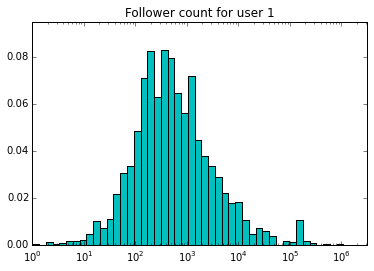

In [40]:
user0FollowCount=convs.followersUser0.dropna().tolist()
bins=np.logspace(0, int(np.log(max(user0FollowCount))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(user0FollowCount,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.095)
plt.title('Follower count for user 1')

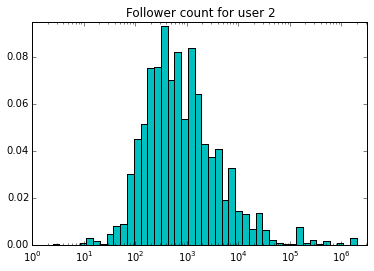

In [39]:
user1FollowCount=convs.followersUser1.dropna().tolist()
bins=np.logspace(0, int(np.log(max(user0FollowCount))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(user1FollowCount,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.095)
plt.title('Follower count for user 2')

* too sparse after user2
* most conversations have 1 or 2 users

In [41]:
np.median(convs.followersUser0.dropna())

451.0

In [42]:
np.median(convs.followersUser1.dropna())

649.0

In [68]:
convs['highFollowUser0']=convs.followersUser0.apply(lambda x: 1 if x>500 else 0)

In [69]:
sum(convs.highFollowUser0)

2503

* So 2503 conversations out of all 5279 are with first user a high follower user

In [70]:
convs['highFollowUser1']=convs.followersUser1.apply(lambda x: 1 if x>500 else 0)

In [71]:
sum(convs.highFollowUser1)

2209

In [72]:
convs['highFollowUser2']=convs.followersUser2.apply(lambda x: 1 if x>500 else 0)

In [73]:
sum(convs.highFollowUser2)

49

In [74]:
convs['highFollowUser3']=convs.followersUser3.apply(lambda x: 1 if x>500 else 0)

In [75]:
sum(convs.highFollowUser3)

10

In [105]:
convs['allHighFollowUsers']=convs.highFollowUser0+convs.highFollowUser1+convs.highFollowUser2+convs.highFollowUser3

In [106]:
min(convs.allHighFollowUsers)

0

In [107]:
max(convs.allHighFollowUsers)

4

In [108]:
len(convs[convs.allHighFollowUsers==0])

2029

In [109]:
len(convs[convs.allHighFollowUsers==1])

1756

In [110]:
len(convs[convs.allHighFollowUsers==2])

1469

In [111]:
len(convs[convs.allHighFollowUsers==3])

23

In [112]:
len(convs[convs.allHighFollowUsers==4])

2

In [87]:
Out[81]+Out[82]+Out[83]+Out[84]+Out[85]

5279

**Group them as such:**
* No high follower users
* One high-follower user
* Two or more high-follower users

In [119]:
NoHighFollow=convs[convs.allHighFollowUsers==0]

In [120]:
OneHighFollow=convs[convs.allHighFollowUsers==1]

In [123]:
ManyHighFollow=convs[convs.allHighFollowUsers>1]

In [125]:
len(NoHighFollow[NoHighFollow.userSetLen==1])/float(len(NoHighFollow))

0.5002464268112371

In [126]:
len(NoHighFollow[NoHighFollow.userSetLen==2])/float(len(NoHighFollow))

0.49630359783144407

In [127]:
len(NoHighFollow[NoHighFollow.userSetLen>2])/float(len(NoHighFollow))

0.0034499753573188764

In [262]:
len(NoHighFollow[NoHighFollow.userSetLen==1])/float(len(convs[convs.userSetLen==1]))

0.7660377358490567

In [264]:
len(NoHighFollow[NoHighFollow.userSetLen==2])/float(len(convs[convs.userSetLen==2]))

0.260475944128298

In [265]:
len(NoHighFollow[NoHighFollow.userSetLen>2])/float(len(convs[convs.userSetLen>2]))

0.07954545454545454

**Takeway:**
* Conversation with no high-follower users are much more often (50%) one-person conversations than overall (25%)
* And they underrepresent the two-person conversations (50%) compared to overall (73%)

In [128]:
len(OneHighFollow[OneHighFollow.userSetLen==1])/float(len(OneHighFollow))

0.1765375854214123

In [129]:
len(OneHighFollow[OneHighFollow.userSetLen==2])/float(len(OneHighFollow))

0.8143507972665148

In [130]:
len(OneHighFollow[OneHighFollow.userSetLen>2])/float(len(OneHighFollow))

0.009111617312072893

**Takeway:**
* Conversation with one high-follower user are less often (18%) one-person conversations than overall (25%)
* But they overrepresent the two-person conversations (81%) compared to overall (73%)

In [131]:
len(ManyHighFollow[ManyHighFollow.userSetLen==1])/float(len(ManyHighFollow))

0.0

In [132]:
len(ManyHighFollow[ManyHighFollow.userSetLen==2])/float(len(ManyHighFollow))

0.9564926372155288

In [133]:
len(ManyHighFollow[ManyHighFollow.userSetLen>2])/float(len(ManyHighFollow))

0.04350736278447122

**Takeway:**
* Conversation with two or more high-follower user are never one-person conversations - obviously
* But they are 95% of the time two-person conversations
* Since the 1 and many high-follower conversations show the same trends - combine them?

In [141]:
AnyHighFollow=convs[convs.allHighFollowUsers>0]

In [142]:
len(AnyHighFollow[AnyHighFollow.userSetLen==1])/float(len(AnyHighFollow))

0.09538461538461539

In [143]:
len(AnyHighFollow[AnyHighFollow.userSetLen==2])/float(len(AnyHighFollow))

0.8796923076923077

In [144]:
len(AnyHighFollow[AnyHighFollow.userSetLen>2])/float(len(AnyHighFollow))

0.024923076923076923

### Conversation size, duration, and speed for 2 types of high-follower participation

#### None

In [134]:
np.median(NoHighFollow.convSize)

2.0

In [135]:
np.percentile(NoHighFollow.convSize,90)

4.0

In [136]:
np.median(NoHighFollow.convoLen)

504.0

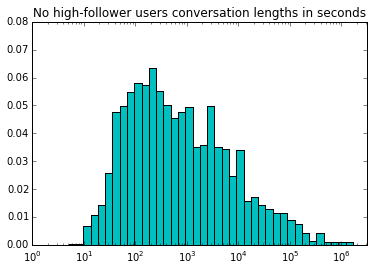

In [137]:
convoLen = NoHighFollow.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('No high-follower users conversation lengths in seconds')

In [138]:
np.median(NoHighFollow.avgTimePerReply)

361.5

In [139]:
np.median(NoHighFollow.medianReplyTime)

317.0

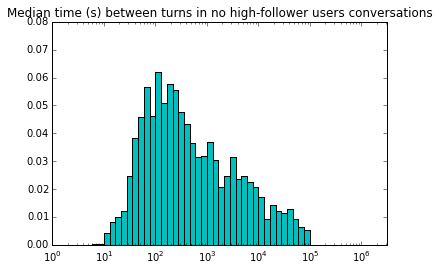

In [140]:
medRepTime=NoHighFollow.medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in no high-follower users conversations')

#### Any

In [146]:
np.median(AnyHighFollow.convSize)

2.0

In [147]:
np.percentile(AnyHighFollow.convSize,90)

4.0

In [148]:
np.median(AnyHighFollow.convoLen)

844.0

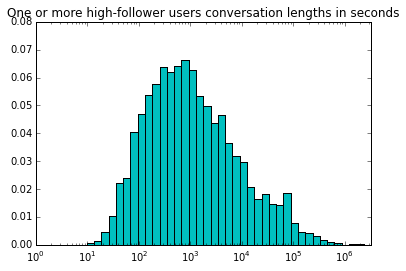

In [149]:
convoLen = AnyHighFollow.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('One or more high-follower users conversation lengths in seconds')

In [150]:
np.median(AnyHighFollow.avgTimePerReply)

545.5

In [151]:
np.median(AnyHighFollow.medianReplyTime)

511.5

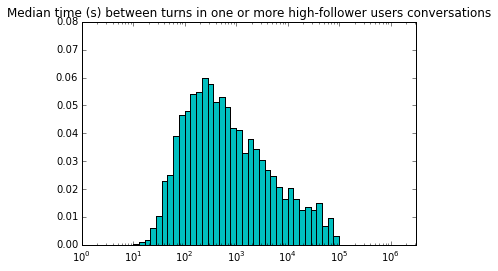

In [152]:
medRepTime=AnyHighFollow.medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in one or more high-follower users conversations')

**High-Followers Takeway:**
* Conversations with one or more high-follower users are less frequently one-person conversation
* And more frequently than overall the two-person conversations
* The not high-follower users much more frequently engage in self-conversation
* The one or more high-follower users conversation are quite a bit longer (seconds) then those with no high-follower users
* Meanwhile both types have the same general distribution of steps in the conversation (med=2, 90%=4)
* This means, and is valided by avd and median inter-reply time, which on average (median) is longer in the conversations with some high-follower users
* The non distributions for convoLen and medInterReplyTime are more humpy, with clearer work sessions lognormals, whereas the some distributions are more smooth and long-tailed
* Does this mean that high-follower users slow down the movement of the conversation because the timing of their reply depends less on the timing of the original than on their own tweeting work practices 

### Are high-followers responsible for slowing down the conversation during?

In [153]:
len(NoHighFollow)/float(len(convs))

0.3843530971774957

In [154]:
len(AnyHighFollow)/float(len(convs))

0.6156469028225042

In [155]:
before=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-15 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-10-25 00:00:00'))]

In [156]:
during=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-25 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-04 00:00:00'))]

In [157]:
after=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-04 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-14 00:00:00'))]

In [158]:
lafter=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-14 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-23 00:00:00'))]

In [162]:
len(before[before.allHighFollowUsers>0])/float(len(before))

0.5496932515337424

In [163]:
len(during[during.allHighFollowUsers>0])/float(len(during))

0.6558724021266312

In [164]:
len(after[after.allHighFollowUsers>0])/float(len(after))

0.6137931034482759

In [165]:
len(lafter[lafter.allHighFollowUsers>0])/float(len(lafter))

0.5870307167235495

** SO YES!:**
* There is a higher percentge of conversations with one or more high-follower users During and to slightly leser degree After
* As compared to Before and Long After
* So it seems that the higher presence of high-followers (like celebs and officials) slows down the conversation During
* DO CHI-SQUARE
* In the future, we can test all this with temporal network models that include follower information as node attributes

### By Strong Ties

In [173]:
strongTieUsers=np.loadtxt('../data/strongTieUsers.txt', dtype=str, delimiter=',')

In [175]:
len(strongTieUsers)

947

In [183]:
convs['strongTiesUser0']=convs.convoUser0.apply(lambda x: 1 if x in strongTieUsers else 0)

In [184]:
convs['strongTiesUser1']=convs.convoUser1.apply(lambda x: 1 if x in strongTieUsers else 0)

In [185]:
convs['strongTiesUser2']=convs.convoUser2.apply(lambda x: 1 if x in strongTieUsers else 0)

In [186]:
convs['strongTiesUser3']=convs.convoUser3.apply(lambda x: 1 if x in strongTieUsers else 0)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if __name__ == '__main__':


In [190]:
convs['strongTiesAllUsers']=convs.strongTiesUser0+convs.strongTiesUser1+convs.strongTiesUser2+convs.strongTiesUser3

In [192]:
max(convs.strongTiesAllUsers)

4

In [193]:
len(convs[convs.strongTiesAllUsers==0])

1515

In [194]:
len(convs[convs.strongTiesAllUsers==1])

1531

In [195]:
len(convs[convs.strongTiesAllUsers==2])

2198

In [196]:
len(convs[convs.strongTiesAllUsers==3])

33

In [197]:
len(convs[convs.strongTiesAllUsers==4])

2

In [198]:
Out[193]+Out[194]+Out[195]+Out[196]+Out[197]

5279

**Group them as such:**
* No strong tie users
* One strong tie user
* Two strong tie users

In [199]:
len(convs[convs.strongTiesAllUsers==0])/float(len(convs))

0.2869861716234135

In [200]:
len(convs[convs.strongTiesAllUsers==1])/float(len(convs))

0.2900170486834628

In [204]:
len(convs[convs.strongTiesAllUsers>1])/float(len(convs))

0.4229967796931237

**FINDING:**
* Two strong tie user conversations are much more common than say one
* This makes sense - the measure looks for people who reply and are replied to frequently (both sides)
* So it takes two people
* In the future could look specifically for strong tier pairs: by finding high weight high reciprocity edges and see what conversation userSets contain those pairs

In [205]:
noStrongTies=convs[convs.strongTiesAllUsers==0]

In [206]:
oneStrongTies=convs[convs.strongTiesAllUsers==1]

In [207]:
manyStrongTies=convs[convs.strongTiesAllUsers>1]

In [208]:
len(noStrongTies[noStrongTies.userSetLen==1])/float(len(noStrongTies))

0.33927392739273926

In [209]:
len(noStrongTies[noStrongTies.userSetLen==2])/float(len(noStrongTies))

0.6488448844884488

In [210]:
len(noStrongTies[noStrongTies.userSetLen>2])/float(len(noStrongTies))

0.011881188118811881

**Takeway:**
* Conversation with no strong-tie users are much more often (33%) one-person conversations than overall (25%)
* And they underrepresent the two-person conversations (64%) compared to overall (73%)

In [211]:
len(oneStrongTies[oneStrongTies.userSetLen==1])/float(len(oneStrongTies))

0.5297191378184193

In [212]:
len(oneStrongTies[oneStrongTies.userSetLen==2])/float(len(oneStrongTies))

0.4598301763553233

In [213]:
len(oneStrongTies[oneStrongTies.userSetLen>2])/float(len(oneStrongTies))

0.010450685826257348

**Takeway:**
* Conversation with one strong-tie user are more often (53%) one-person conversations than overall (25%)
* But they underrepresent the two-person conversations (45%) compared to overall (73%)
* Since the none and one strong tie convesations show the same trend, should I combine them?

In [214]:
len(manyStrongTies[manyStrongTies.userSetLen==1])/float(len(manyStrongTies))

0.0

In [215]:
len(manyStrongTies[manyStrongTies.userSetLen==2])/float(len(manyStrongTies))

0.9758172861621137

In [216]:
len(manyStrongTies[manyStrongTies.userSetLen>2])/float(len(manyStrongTies))

0.02418271383788625

**Takeway:**
* Conversation with one or more strong-tie user are never one-person conversations - obviously
* But they are 98% of the time two-person conversations

In [217]:
fewStrongTies=convs[convs.strongTiesAllUsers<2]

In [218]:
len(fewStrongTies[fewStrongTies.userSetLen==1])/float(len(fewStrongTies))

0.4349967170059094

In [219]:
len(fewStrongTies[fewStrongTies.userSetLen==2])/float(len(fewStrongTies))

0.5538411030860144

In [220]:
len(fewStrongTies[fewStrongTies.userSetLen>2])/float(len(fewStrongTies))

0.011162179908076166

### Conversation size, duration, and speed for 2 types of strong-tie participation

#### Few (0 or 1)

In [221]:
np.median(fewStrongTies.convSize)

2.0

In [222]:
np.percentile(fewStrongTies.convSize,90)

3.0

In [223]:
np.median(fewStrongTies.convoLen)

497.0

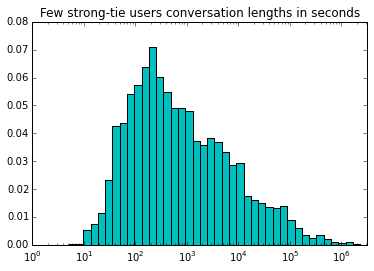

In [224]:
convoLen = fewStrongTies.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Few strong-tie users conversation lengths in seconds')

In [225]:
np.median(fewStrongTies.avgTimePerReply)

428.5

In [226]:
np.median(fewStrongTies.medianReplyTime)

427.0

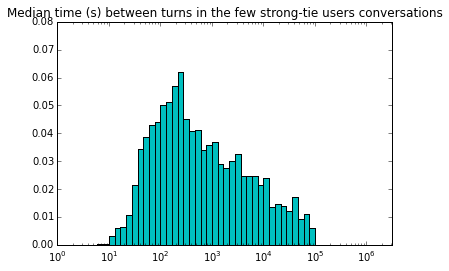

In [231]:
medRepTime=fewStrongTies.medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in the few strong-tie users conversations')

#### Many (2 and up)

In [228]:
np.median(manyStrongTies.convSize)

3.0

In [229]:
np.percentile(manyStrongTies.convSize,90)

5.0

In [230]:
np.median(manyStrongTies.convoLen)

1034.0

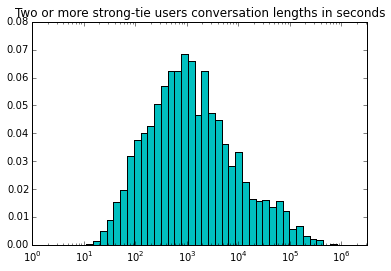

In [232]:
convoLen = manyStrongTies.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Two or more strong-tie users conversation lengths in seconds')

In [233]:
np.median(manyStrongTies.avgTimePerReply)

536.0

In [234]:
np.median(manyStrongTies.medianReplyTime)

451.0

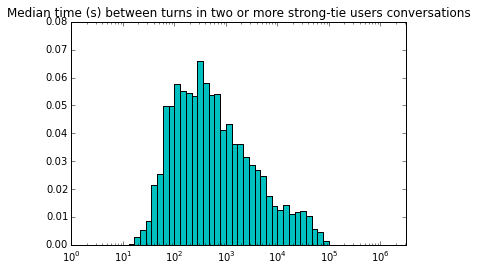

In [235]:
medRepTime=manyStrongTies.medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in two or more strong-tie users conversations')

**Strong-Tie Takeway:**
* Conversations with one or less strong-tie users are more frequently one-person conversation (43% vs 25% overall)
* And less frequently than overall the two-person conversations (56% vs 73% overall)
* The two or more strong-tie users conversation have more steps then those with few strong-tie users (med=3, 90%=5)
* Meanwhile, the avg and median inter-reply time for many strong-tie conversations, are on average (median) similar to the few strong-tie conversations
* But this produces longer conversations in the many strong-ties case
* So the strong-tie pairs produce longer conversations because their conversations have more exchages, while the pace is more or less the same
* inter-reply time distribution for few strong-tie conversations is more smooth than for many with less pronounced work session peaks - reply timing depends more on thier own tweeting patterns than on the timing of the original 
* In the conversations with two or more strong-tie people, there are clear work session peaks - users have 3-4 practices of replying to their conversation partners

### Do strong-tie users lengthen the conversations during and long after?

In [240]:
len(fewStrongTies)/float(len(convs))

0.5770032203068763

In [239]:
len(manyStrongTies)/float(len(convs))

0.4229967796931237

In [241]:
before=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-15 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-10-25 00:00:00'))]

In [242]:
during=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-25 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-04 00:00:00'))]

In [243]:
after=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-04 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-14 00:00:00'))]

In [244]:
lafter=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-14 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-23 00:00:00'))]

In [245]:
len(before[before.strongTiesAllUsers>1])/float(len(before))

0.4294478527607362

In [246]:
len(during[during.strongTiesAllUsers>1])/float(len(during))

0.3977767037216046

In [247]:
len(after[after.strongTiesAllUsers>1])/float(len(after))

0.43448275862068964

In [248]:
len(lafter[lafter.strongTiesAllUsers>1])/float(len(lafter))

0.459613196814562

** NO!:**
* No strong difference across time periods
* LOOK INTO THIS - cause if they are not more frequent During
* What makes convos longer during (if that's in fact true - confused now)

In [249]:
convs.to_csv('../data/bbAllFullConvosAW.csv',sep=';')